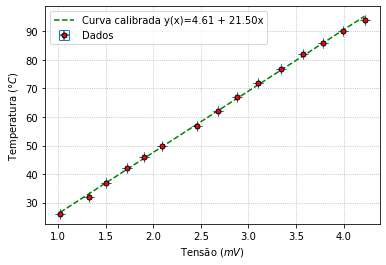

In [12]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import ZebraLib as zb

#Dados
y = np.array([26, 32, 37, 42, 46, 50, 57, 62, 67, 72, 77, 82, 86, 90, 94])
x = np.array([1.02, 1.32, 1.5, 1.72, 1.9, 2.09, 2.46, 2.68, 2.88, 3.1, 3.34, 3.57, 3.78, 3.99, 4.22])
erx = np.full_like(np.arange(0, len(x), dtype=int), fill_value=0.25)
ery = np.full_like(np.arange(0, len(x), dtype=int), fill_value=0.001)

#Figura
fig, ax = plt.subplots()
ax.set(ylabel=r'Temperatura ($°C$)', xlabel=r'Tensão ($mV$)')

#Erros de medida e dados
#ax.scatter(x, y, color='red', label='Dados')
ax.errorbar(x, y, xerr=erx, yerr=ery, fmt='o', markeredgecolor='black', 
            markerfacecolor='red', label='Dados', markersize=5, capsize=5)

#Regressão linear dos dados
res = scipy.stats.linregress(x, y)
ax.plot(x, res.intercept + res.slope*x, linestyle='--', color='green'
        #,label=r'Aproximação $r^2=$' + f'{res.rvalue:.4f}')
        , label='Curva calibrada'+ f' y(x)={res.intercept:.2f} + {res.slope:.2f}x')

ax.grid(ls='dotted')
ax.legend()

In [13]:
def desvio_saida(res, x_list, y_list):
    val = 0
    for i in range(len(x_list)):
        val_aprox = res.intercept + res.slope*x_list[i]
        val_medida = y_list[i]
        val = val + (val_aprox-val_medida)**2
    return np.sqrt(val/len(x_list))

In [14]:
print(f'Coeficiente linear: {res.intercept:.3}')
print(f'Coeficiente angular: {res.slope:.3}')
print(f'Correlação de Pearson: {res.rvalue:.3}')
print(f'Desvio do valor da saida: {desvio_saida(res, x, y):.3}')
print(f'Desvio do valor da entrada: {desvio_saida(res, x, y)/res.slope:.3}')
print(f'Desvio padrão do erro do coeficiente angular: {res.stderr:.3}')
print(f'Desvio padrão do erro do coeficiente linear: {res.intercept_stderr:.3}')

Coeficiente linear: 4.61
Coeficiente angular: 21.5
Correlação de Pearson: 1.0
Desvio do valor da saida: 0.618
Desvio do valor da entrada: 0.0288
Desvio padrão do erro do coeficiente angular: 0.174
Desvio padrão do erro do coeficiente linear: 0.489


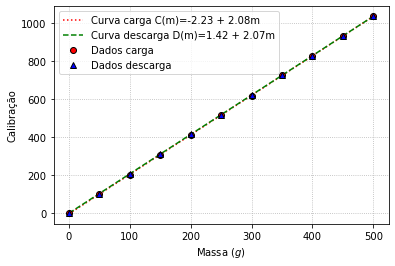

In [15]:
df1 = pd.read_excel('D:/UNESP/8 semestre - Eng/Instrumentação Mecânica/Labs/dados_primeiro_experimeto.xlsx')

#Dados
m1, c1, d1 = df1.Massa.values, df1.Carga.values, df1.Descarga.values

#Figura
fig, ax = plt.subplots()
ax.set(xlabel=r'Massa ($g$)', ylabel=r'Calibração')

#Erros de medida e dados
ax.errorbar(m1, c1,fmt='o', markeredgecolor='black', 
            markerfacecolor='red', label='Dados carga', markersize=6, capsize=5)
ax.errorbar(m1, d1,fmt='^', markeredgecolor='black', 
            markerfacecolor='blue', label='Dados descarga', markersize=6, capsize=5)

#Regressão linear dos dados
res = scipy.stats.linregress(m1, c1)
resd = scipy.stats.linregress(m1, d1)

ax.plot(m1, res.intercept + res.slope*m1, linestyle=':', color='red'
        ,label='Curva carga'+ f' C(m)={res.intercept:.2f} + {res.slope:.2f}m')
ax.plot(m1, resd.intercept + resd.slope*m1, linestyle='--', color='green'
        ,label='Curva descarga'+ f' D(m)={resd.intercept:.2f} + {resd.slope:.2f}m')

ax.grid(ls='dotted')
ax.legend()
fig.savefig('Calibração_1.pdf', bbox_inches='tight')


In [16]:
#Expressão de calibração
print(f'Curva de calibração carga - T(x)=({res.intercept:.5f} + {res.slope:.5f}*x)')
print(f'Curva de calibração descarga - T(x)=({resd.intercept:.5f} + {resd.slope:.5f}*x)')

Curva de calibração carga - T(x)=(-2.22727 + 2.07800*x)
Curva de calibração descarga - T(x)=(1.41545 + 2.07216*x)


In [17]:
def calibrar(res, x):
    return (res.intercept + x)/res.slope

print(f'Curva de calibração carga - T(x)={calibrar(res, 504):.3f}')
print(f'Curva de calibração descarga - T(x)={calibrar(resd, 504):.3f}')

Curva de calibração carga - T(x)=241.469
Curva de calibração descarga - T(x)=243.907


In [18]:
print(f'Curva de calibração carga - T(x)={((calibrar(res, 504)-244.9)/244.9)*100:.3f}')
print(f'Curva de calibração descarga - T(x)={((calibrar(resd, 504)-244.9)/244.9)*100:.3f}')

Curva de calibração carga - T(x)=-1.401
Curva de calibração descarga - T(x)=-0.405


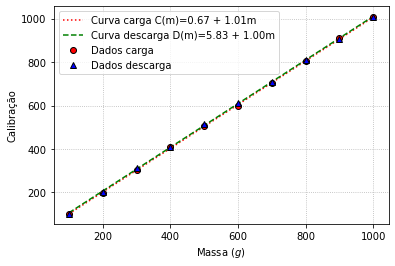

In [19]:
df2 = pd.read_excel('D:/UNESP/8 semestre - Eng/Instrumentação Mecânica/Labs/dados_primeiro_experimeto.xlsx', sheet_name='segundo')

#Dados
m2, c2, d2 = df2.Massa.values, df2.Carga.values, df2.Descarga.values

#Figura
fig, ax = plt.subplots()
ax.set(xlabel=r'Massa ($g$)', ylabel=r'Calibração')

#Erros de medida e dados
ax.errorbar(m2, c2,fmt='o', markeredgecolor='black', 
            markerfacecolor='red', label='Dados carga', markersize=6, capsize=5)
ax.errorbar(m2, d2,fmt='^', markeredgecolor='black', 
            markerfacecolor='blue', label='Dados descarga', markersize=6, capsize=5)

#Regressão linear dos dados
res = scipy.stats.linregress(m2, c2)
resd = scipy.stats.linregress(m2, d2)

ax.plot(m2, res.intercept + res.slope*m2, linestyle=':', color='red'
        ,label='Curva carga'+ f' C(m)={res.intercept:.2f} + {res.slope:.2f}m')
ax.plot(m2, resd.intercept + resd.slope*m2, linestyle='--', color='green'
        ,label='Curva descarga'+ f' D(m)={resd.intercept:.2f} + {resd.slope:.2f}m')

ax.grid(ls='dotted')
ax.legend()
fig.savefig('Calibração_2.pdf', bbox_inches='tight')

In [20]:
#Expressão de calibração
print(f'Curva de calibração carga - T(x)=({res.intercept:.5f} + {res.slope:.5f}*x)')
print(f'Curva de calibração descarga - T(x)=({resd.intercept:.5f} + {resd.slope:.5f}*x)')

Curva de calibração carga - T(x)=(0.66667 + 1.00561*x)
Curva de calibração descarga - T(x)=(5.83333 + 1.00485*x)


In [21]:
print(f'Curva de calibração carga - T(x)={calibrar(res, 250):.3f}')
print(f'Curva de calibração descarga - T(x)={calibrar(resd, 250):.3f}')

Curva de calibração carga - T(x)=249.269
Curva de calibração descarga - T(x)=254.599


In [22]:
(504+2.22)/2.07

244.55072463768118

In [ ]:
print(f'Coeficiente linear: {res.intercept:.3}')
print(f'Coeficiente angular: {res.slope:.3}')
print(f'Correlação de Pearson: {res.rvalue:.3}')
print(f'Desvio do valor da saida: {desvio_saida(res, x, y):.3}')
print(f'Desvio do valor da entrada: {desvio_saida(res, x, y)/res.slope:.3}')
print(f'Desvio padrão do erro do coeficiente angular: {res.stderr:.3}')
print(f'Desvio padrão do erro do coeficiente linear: {res.intercept_stderr:.3}')